# ARIMA - SARIMA

In [26]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARIMA
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import warnings
from statsmodels.stats.diagnostic import acorr_ljungbox
import pmdarima as pm
from pmdarima import model_selection
import statsmodels.api as sm
warnings.filterwarnings('ignore')
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error 

In [2]:
df = pd.read_csv('DS3_C1_S4_SuperstoreSales_Data_Challenge.csv')
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11-08-2016,11-11-2016,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11-08-2016,11-11-2016,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,731.9400,3,0.00,219.5820
2,4,US-2015-108966,10-11-2015,10/18/2015,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,06-09-2014,6/14/2014,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,06-09-2014,6/14/2014,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,1706.1840,9,0.20,85.3092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2116,9963,CA-2015-168088,3/19/2015,3/22/2015,First Class,Home Office,United States,Houston,Texas,77041,Central,Furniture,383.4656,4,0.32,-67.6704
2117,9965,CA-2016-146374,12-05-2016,12-10-2016,Second Class,Corporate,United States,Newark,Delaware,19711,East,Furniture,13.4000,1,0.00,6.4320
2118,9981,US-2015-151435,09-06-2015,09-09-2015,Second Class,Consumer,United States,Lafayette,Louisiana,70506,South,Furniture,85.9800,1,0.00,22.3548
2119,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,25.2480,3,0.20,4.1028


In [3]:
cpdf = df.copy()

In [5]:
cpdf['Order Date'] = pd.to_datetime(cpdf['Order Date'],format='mixed')
cpdf=cpdf.set_index("Order Date")

In [6]:
cpdf = cpdf['Sales'].resample('M').mean()

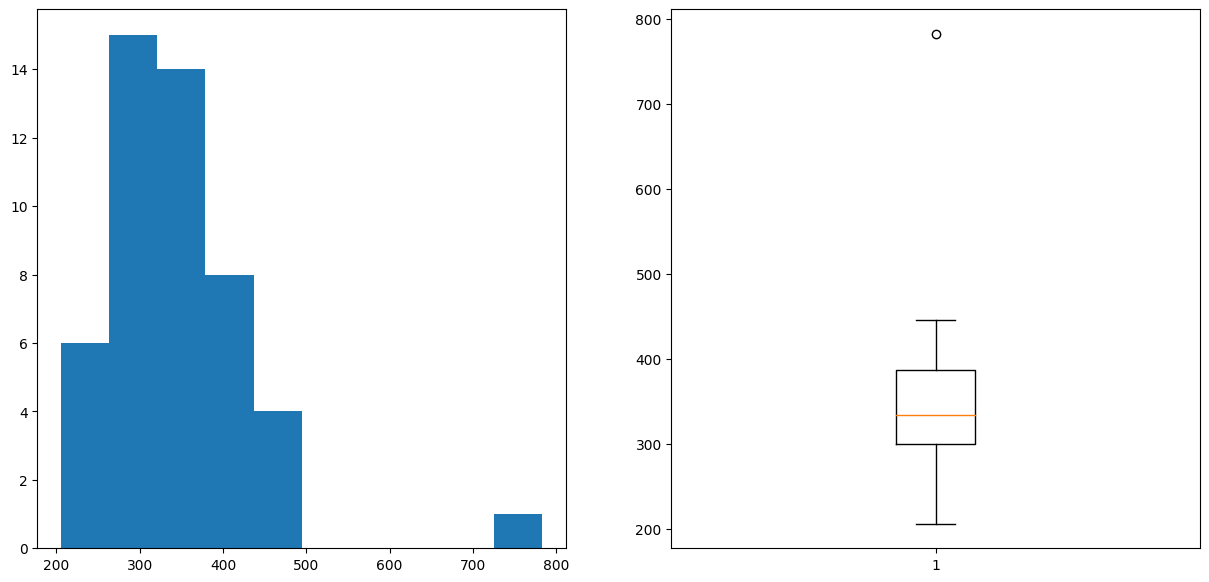

In [7]:
fig,ax=plt.subplots(1,2,figsize=(15,7))
ax=ax.ravel()
ax[0].hist(cpdf)
ax[1].boxplot(cpdf)
plt.show()

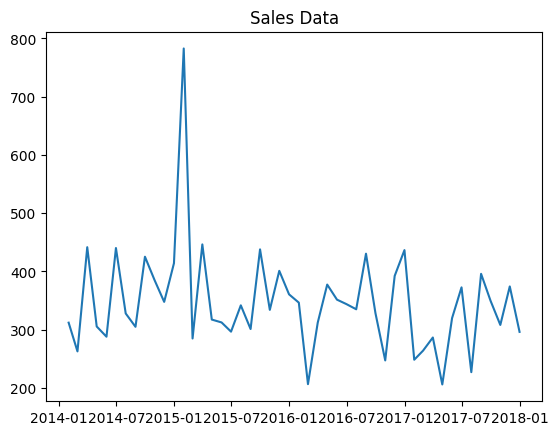

In [8]:
plt.plot(cpdf)
plt.title('Sales Data')
plt.show()

In [9]:
decomposition=seasonal_decompose(cpdf,period=12)
decomposition

In [10]:
trend=decomposition.trend
sesonal=decomposition.seasonal
residual=decomposition.resid

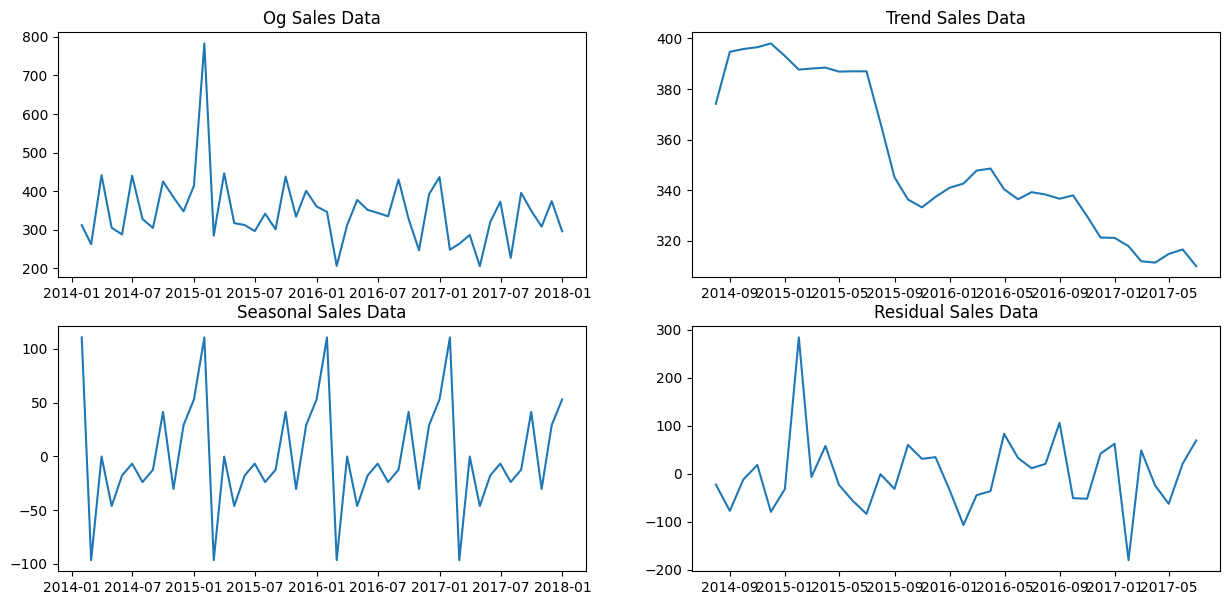

In [11]:
fig,ax=plt.subplots(2,2,figsize=(15,7))
ax=ax.ravel()
ax[0].plot(cpdf)
ax[0].set_title('Og Sales Data')
ax[1].plot(trend,data=cpdf)
ax[1].set_title('Trend Sales Data')
ax[2].plot(sesonal,data=cpdf)
ax[2].set_title('Seasonal Sales Data')
ax[3].plot(residual,data=cpdf)
ax[3].set_title('Residual Sales Data')

plt.show()

In [12]:
#Augumented Dickey-Fuller test for Stationary Testing
result = adfuller(cpdf)
p_value1 = result[1]

In [13]:
p_value1

9.09339851000658e-10

In [14]:
# data is stationary

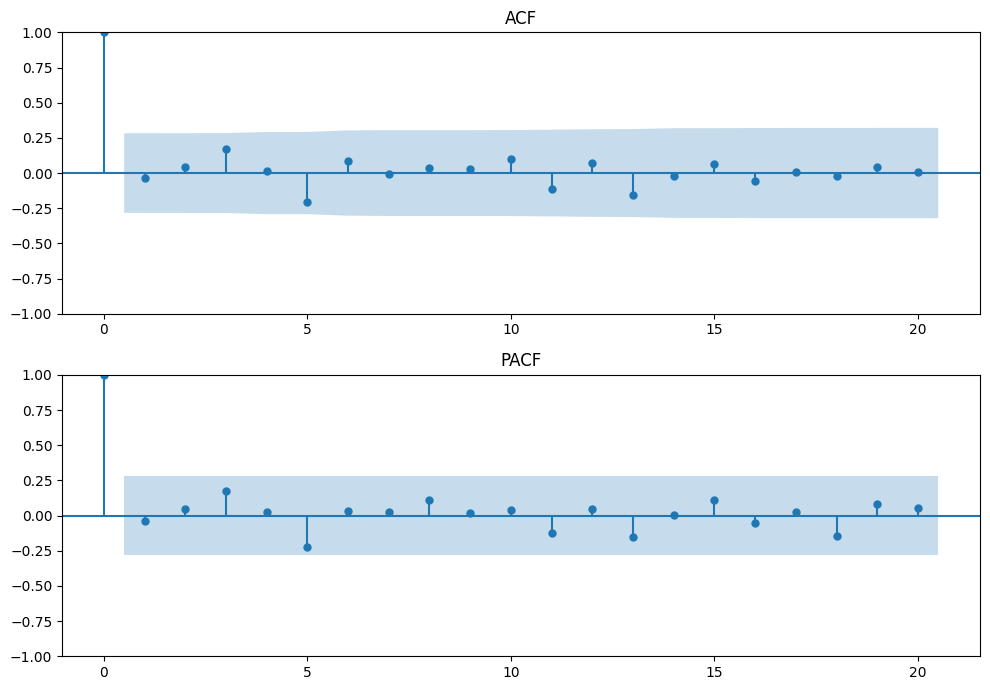

In [15]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,7))

#ACF_PLOT
plot_acf(cpdf, lags = 20, ax=ax[0])
ax[0].set_title('ACF')

#PACF_PLOT
plot_pacf(cpdf, lags=20,ax=ax[1])
ax[1].set_title('PACF')

plt.tight_layout()

In [17]:
split_data = int(0.7*len(cpdf))
train_data=cpdf.iloc[:split_data]
test_data = cpdf.iloc[split_data:]

In [52]:
train_data

Order Date
2014-01-31    312.126250
2014-02-28    262.808286
2014-03-31    441.635030
2014-04-30    305.570654
2014-05-31    288.032792
2014-06-30    440.204187
2014-07-31    327.910636
2014-08-31    305.014437
2014-09-30    425.294300
2014-10-31    384.507719
2014-11-30    347.820527
2014-12-31    414.134682
2015-01-31    782.662773
2015-02-28    284.943091
2015-03-31    446.420821
2015-04-30    317.445409
2015-05-31    312.498350
2015-06-30    296.699192
2015-07-31    341.860500
2015-08-31    301.206006
2015-09-30    437.883717
2015-10-31    334.072875
2015-11-30    401.049773
2015-12-31    360.715925
2016-01-31    346.488318
2016-02-29    206.607947
2016-03-31    312.221756
2016-04-30    377.488286
2016-05-31    351.624070
2016-06-30    343.962421
2016-07-31    335.090231
2016-08-31    430.456286
2016-09-30    328.468445
Freq: M, Name: Sales, dtype: float64

In [30]:
def walk_fwd_validation(cpdf,train_size,p_values,d_values,q_values):
    train=cpdf[:train_size]
    test=cpdf[train_size:]
    
    best_score=float("inf")
    for p in p_values:
        for d in d_values:
            for q in q_values:
                
                past_data=[x for x in train]
                for i in range(len(test)):
                    model=sm.tsa.ARIMA(past_data,order=(p,d,q))
                    model=model.fit()
                    pred=model.predict(start=train_size,end=len(cpdf)-1)
                    rmse=mean_squared_error(test,pred)
                    
                    if rmse<best_score:
                        best_score=rmse
                        optimal_value=(p,d,q)
    return optimal_value                                            

In [31]:
p_values=np.arange(0,6)
q_values=np.arange(0,5)
d_values=np.arange(0,3)
train_size=int(len(cpdf)*0.8)
best_params=walk_fwd_validation(cpdf,train_size,p_values,d_values,q_values)

In [32]:
best_params

(4, 2, 3)

In [35]:
ar_ml2=sm.tsa.ARIMA(train_data,order=(4,2,3)).fit()
pred1=ar_ml2.predict(0,len(test_data)-1)

In [36]:
pred1

Order Date
2014-01-31      0.000000
2014-02-28    466.349902
2014-03-31    229.095660
2014-04-30    463.253858
2014-05-31    389.396485
2014-06-30    357.570694
2014-07-31    364.747023
2014-08-31    356.380775
2014-09-30    382.136738
2014-10-31    372.637628
2014-11-30    355.401854
2014-12-31    419.947169
2015-01-31    415.556491
2015-02-28    488.801150
2015-03-31    591.328193
Freq: M, Name: predicted_mean, dtype: float64

In [37]:
lb_p_val = acorr_ljungbox(ar_ml2.resid, lags = [20], return_df = True)
lb_p_val

,lb_stat,lb_pvalue
20,19.510423,0.488905


In [38]:
#pvalue > 0.05 
# good model

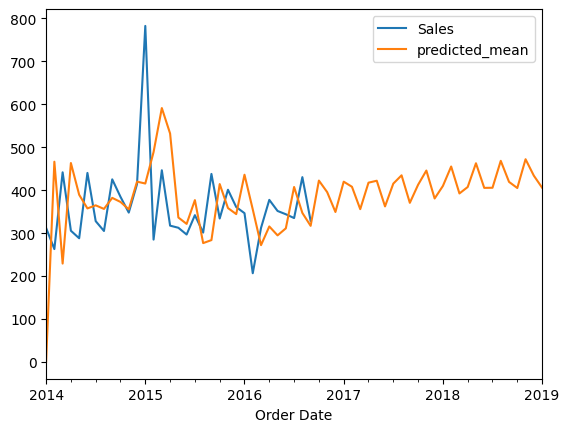

In [39]:
train_data.plot()
ar_ml2.predict(start = 0, end = 60).plot()
plt.legend()

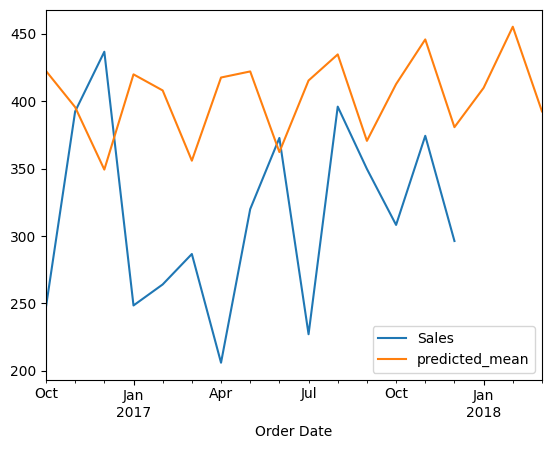

In [40]:
test_data.plot()
ar_ml2.predict(start=33,end=50).plot()
plt.legend()
plt.show()

**Sarima**

In [66]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [67]:
# model_s=sm.tsa.statespace.SARIMAX(train_data,order=(4,2,3),seasonal_order=(4,2,3,12))
# model_sm=model_s.fit()

In [68]:
order = (4,1,3)
seasonal_order =(4,1,3,12)
ml1 = SARIMAX(train_data, order = order, seasonal_order=seasonal_order)#seasonorder = p,d,q,m
mdl_s =ml1.fit()

In [69]:
pred_sa = mdl_s.predict(start = cpdf.index[0], end = cpdf.index[-1])

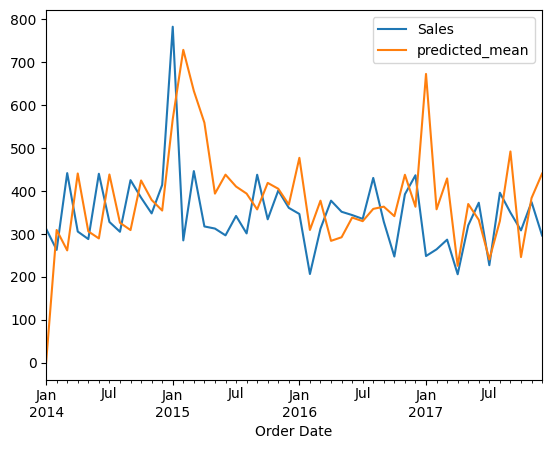

In [70]:
cpdf.plot()
mdl_s.predict(start =0, end = len(cpdf)-1).plot()
plt.legend()

In [71]:
lb_p_val = acorr_ljungbox(mdl_s.resid, lags = [20], return_df = True)
lb_p_val

,lb_stat,lb_pvalue
20,18.714402,0.540454


In [ ]:
#pvalue>0.05, good model